In [ ]:
!pip uninstall -y torch torchvision torchaudio

Found existing installation: torch 2.3.1+cu121
Uninstalling torch-2.3.1+cu121:
  Successfully uninstalled torch-2.3.1+cu121
Found existing installation: torchvision 0.18.1+cu121
Uninstalling torchvision-0.18.1+cu121:
  Successfully uninstalled torchvision-0.18.1+cu121
Found existing installation: torchaudio 2.3.1+cu121
Uninstalling torchaudio-2.3.1+cu121:
  Successfully uninstalled torchaudio-2.3.1+cu121


In [ ]:
!pip install torch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 46.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.18.0 requires torch>=2.3.0, but you have torch 1.13.1 which is incompatible.


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import torch.nn as nn
# import torch.nn.functional as F
seed = 1234
np.random.seed(seed)

In [ ]:
import torch
torch.manual_seed(seed)

In [ ]:
class TorchClassifier(nn.Module):
  def __init__(self):
    super(TorchClassifier, self).__init__()
    self.layer1 = nn.Linear(16, 8)
    self.layer2 = nn.Linear(8, 4)
    self.layer3 = nn.Linear(4, 2)
    self.layer4 = nn.Linear(2, 1)
  def forward(self, x):
    x = F.elu(self.layer1(x))
    x = F.elu(self.layer2(x))
    x = F.elu(self.layer3(x))
    x = torch.sigmoid(self.layer4(x))
    return x

In [ ]:
model = TorchClassifier()
print(model)

TorchClassifier(
  (layer1): Linear(in_features=16, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=4, bias=True)
  (layer3): Linear(in_features=4, out_features=2, bias=True)
  (layer4): Linear(in_features=2, out_features=1, bias=True)
)


In [ ]:
model(torch.rand(16))

tensor([0.4240], grad_fn=<SigmoidBackward0>)

In [ ]:
x, y = make_classification(n_samples = 1000, n_features = 16)
x_tr, x_test, y_tr, y_test = train_test_split(x, y, train_size = 0.8)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, train_size = 0.5)
print(x)
print(y)

[[ 1.79895052  1.96670655  0.17897478 ... -1.42755183  1.17896673
   1.01605902]
 [ 1.3935333   1.30682251 -0.0218383  ...  0.63575509  0.32405938
   0.20233232]
 [-0.02615544 -0.45787821 -0.91801815 ... -0.32506505 -0.92711891
  -1.06000793]
 ...
 [ 0.38527891  0.28414157 -1.55975927 ... -0.61600807 -0.65972868
  -0.78274553]
 [ 0.76569147  0.96724496 -0.04834572 ...  0.8739559  -0.71020398
   0.87802803]
 [ 0.92631279  0.49243087 -0.7840332  ...  0.55738608  0.8853626
  -1.84860393]]
[0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1
 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0
 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 

In [ ]:
from torch.utils.data import Dataset
class NumpyDataset(Dataset):

  def __init__(self, x, y):
    if (x.shape[0] != y.shape[0]):
      raise Exception("Incompatible arrays")
    y = y.reshape(-1,1)
    self.x = torch.from_numpy(x).to(torch.float)
    self.y = torch.from_numpy(y).to(torch.float)

  def __getitem__(self, i):
    return self.x[i], self.y[i]

  def __len__(self):
    return self.y.shape[0]

In [ ]:
tr_data = NumpyDataset(x_tr, y_tr)
val_data = NumpyDataset(x_val, y_val)
test_data = NumpyDataset(x_test, y_test)

In [ ]:
print(tr_data[0])
print("Length:", len(tr_data))

(tensor([ 1.4791,  1.4646,  0.0430,  0.0409, -0.3792, -0.5357,  0.9736, -1.3697,
        -1.2596,  1.5159, -0.9276,  0.6868,  0.5138,  0.4751,  1.0193, -1.7873]), tensor([0.]))
Length: 800


In [ ]:
from torch.utils.data import DataLoader
tr_loader = iter(DataLoader(tr_data, batch_size = 2, shuffle = True))
print(next(tr_loader))

[tensor([[-1.2835, -0.4155,  0.4518,  0.6778, -1.3869, -0.4262, -0.1016,  1.4012,
         -0.9625,  1.0038,  0.3946,  0.1961, -0.7455,  0.4267, -0.8352,  0.9295],
        [-1.4578, -0.4947, -1.1755, -0.4800, -0.3247,  0.7821, -0.0078, -0.5397,
         -1.0385, -1.3466,  0.4591,  0.5761,  0.2188, -0.1447,  0.3534,  0.5055]]), tensor([[0.],
        [0.]])]


In [ ]:
get_loss = F.binary_cross_entropy
print(get_loss(torch.tensor([1.]), torch.tensor([1.])))

tensor(0.)


In [ ]:
tr_loader = DataLoader(tr_data, batch_size = 100, shuffle = True)
opt = torch.optim.Adam(model.parameters(), lr = 0.005)

In [ ]:
def run_epoch(opt, tr_loader):
  for data in iter(tr_loader):
    x, y = data
    opt.zero_grad()
    # Compute gradients.
    loss = get_loss(model(x), y)
    loss.backward()
    opt.step() # Update the weights.
  return get_loss(model(tr_data.x), tr_data.y)

In [ ]:
tr_losses = []
val_losses = []
while (len(val_losses) < 2 or val_losses[-1] < val_losses[-2]):
  tr_losses.append(float(run_epoch(opt, tr_loader)))
  val_losses.append(float(get_loss(model(val_data.x), val_data.y)))


In [ ]:
tr_losses


[0.6727226972579956,
 0.6379682421684265,
 0.5861395597457886,
 0.5128965973854065,
 0.4244297742843628,
 0.3381580114364624,
 0.2673083543777466,
 0.21979708969593048,
 0.19382713735103607,
 0.18189850449562073,
 0.176894411444664]

In [ ]:
val_losses

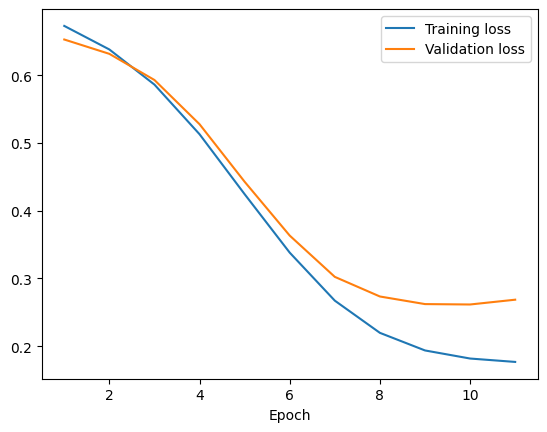

In [ ]:
import matplotlib.pyplot as plt
def plot_losses(tr_loss, val_loss):
  epochs = np.array(range(len(tr_loss))) + 1
  plt.plot(epochs, tr_loss, label = "Training loss")
  plt.plot(epochs, val_loss, label = "Validation loss")
  plt.xlabel("Epoch")
  plt.legend()
  plt.show()

plot_losses(tr_losses, val_losses)

In [ ]:
train_acc = accuracy_score((model(tr_data.x) >= 0.5).to(float), tr_data.y)
val_acc = accuracy_score((model(val_data.x) >= 0.5).to(float), val_data.y)
test_acc = accuracy_score((model(test_data.x) >= 0.5).to(float), test_data.y)
print("Training accuracy:", train_acc)
print("Validation accuracy:", val_acc)
print("Test accuracy:", test_acc)

Training accuracy: 0.94
Validation accuracy: 0.92
Test accuracy: 0.96


In [ ]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 12.3 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=591e49ed2579cf28ea138b915c82e5261aa2766fcfb99594a84a370b446b16a2
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
x, y = make_classification(n_samples = 500, n_features = 16)
x_tr, x_test, y_tr, y_test = train_test_split(x, y, train_size = 0.8)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, train_size = 0.5)
tr_data = NumpyDataset(x_tr, y_tr)
val_data = NumpyDataset(x_val, y_val)
test_data = NumpyDataset(x_test, y_test)
# tr_loader = DataLoader(tr_data, batch_size = 20, shuffle = True)

In [ ]:
print(tr_data)
# print(x_tr)
print(x)

[[-0.50049451  0.88938796 -1.2671346  ... -1.43977433  1.42569501
  -1.19503142]
 [ 0.04856134  0.89775947 -2.50192629 ... -0.98769401  0.6280447
  -0.68735112]
 [ 2.97962282  0.2457296  -0.55472857 ...  0.68081993  1.35696991
   1.72315929]
 ...
 [ 0.55680658  1.0313902   0.30203557 ... -1.84967432 -0.5745112
  -0.22637378]
 [ 0.0274367  -1.00174523 -0.70263779 ... -0.85808636 -2.43751632
   1.68229455]
 [ 1.60118097  0.34223193 -0.81512837 ...  0.40039716  1.50752641
   0.7899595 ]]


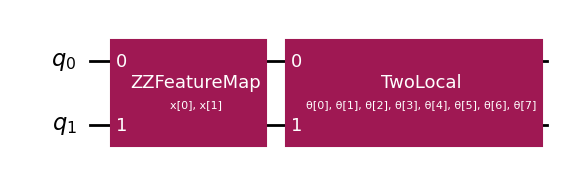

In [ ]:
num_inputs = 2
feature_map = ZZFeatureMap(num_inputs,reps =1)
ansatz = TwoLocal(2, ['ry','rz'], 'cz', 'linear', reps = 1)
qc = QuantumCircuit(num_inputs)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
qc.draw("mpl")


In [ ]:
!pip install  qiskit-machine-learning

  Using cached qiskit_machine_learning-0.7.2-py3-none-any.whl.metadata (12 kB)
  Using cached qiskit-1.1.1-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached qiskit_algorithms-0.3.0-py3-none-any.whl.metadata (4.2 kB)
  Using cached fastdtw-0.3.4.tar.gz (133 kB)
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.6 MB/s eta 0:00:00
  Created wheel for fastdtw: 

In [ ]:
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector
from qiskit_algorithms.utils import algorithm_globals
# from qiskit_aer import AerSimulator

In [ ]:
class HybridQNN(nn.Module):
  def __init__(self):
    super(HybridQNN, self).__init__()
    qnn = EstimatorQNN(circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters,input_gradients=True)
    initial_weights = 0.1 * (2 * algorithm_globals.random.random(qnn.num_weights) - 1)
    self.layer1 = nn.Linear(16, 2)
    self.qnn = TorchConnector(qnn, initial_weights=initial_weights)
    self.final_layer = nn.Linear(1,1)
  def forward(self, x):
    x = torch.sigmoid(self.layer1(x))
    x = self.qnn(x)
    x = torch.sigmoid(self.final_layer(x))
    return x

In [ ]:
model1 = HybridQNN()
opt = torch.optim.Adam(model1.parameters(), lr = 0.005)

In [ ]:
print(model1)

HybridQNN(
  (layer1): Linear(in_features=16, out_features=2, bias=True)
  (qnn): TorchConnector()
  (final_layer): Linear(in_features=1, out_features=1, bias=True)
)


In [ ]:
def run_epoch1(opt, tr_loader):
  for data in iter(tr_loader):
    x, y = data
    opt.zero_grad()
    # Compute gradients.
    loss = get_loss(model1(x), y)
    loss.backward()
    opt.step() # Update the weights.
  return get_loss(model1(tr_data.x), tr_data.y)

In [ ]:
tr_losses = []
val_losses = []

while (len(val_losses) < 2 or val_losses[-1] < val_losses[-2]):
  print("EPOCH", len(tr_losses) + 1, end = " ")
  tr_losses.append(float(run_epoch1(opt, tr_loader)))
  val_losses.append(float(get_loss(model1(val_data.x), val_data.y)))
  print("| Train loss:", round(tr_losses[-1], 4), end = " ")
  print("| Valid loss:", round(val_losses[-1], 4))

EPOCH 1 EPOCH 2 EPOCH 3 EPOCH 4 EPOCH 5 EPOCH 6 EPOCH 7 EPOCH 8 EPOCH 9 EPOCH 10 EPOCH 11 EPOCH 12 EPOCH 13 EPOCH 14 EPOCH 15 EPOCH 16 EPOCH 17 

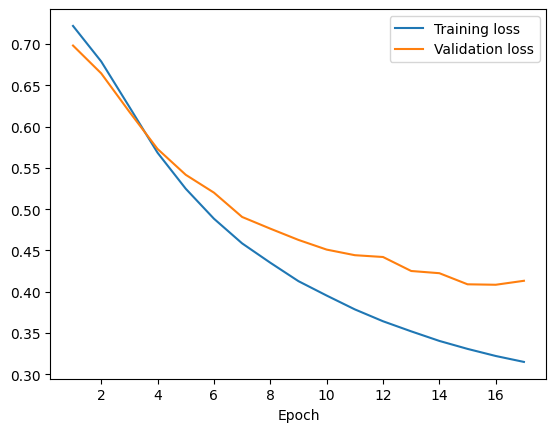

[0.7219909429550171,
 0.6789417862892151,
 0.6238394379615784,
 0.5683467984199524,
 0.524746835231781,
 0.48846280574798584,
 0.4585730731487274,
 0.43513786792755127,
 0.41277027130126953,
 0.39535340666770935,
 0.37859004735946655,
 0.3642120361328125,
 0.35198748111724854,
 0.34037941694259644,
 0.33073174953460693,
 0.322134405374527,
 0.3149515688419342]

In [ ]:
plot_losses(tr_losses, val_losses)
tr_losses

In [ ]:
tr_acc1 = accuracy_score((model1(tr_data.x) >= 0.5).to(float), tr_data.y)
val_acc1 = accuracy_score((model1(val_data.x) >= 0.5).to(float), val_data.y)
test_acc1 = accuracy_score((model1(test_data.x) >= 0.5).to(float), test_data.y)
print("Training accuracy:", tr_acc1)
print("Validation accuracy:", val_acc1)
print("Test accuracy:", test_acc1)


Training accuracy: 0.9025
Validation accuracy: 0.84
Test accuracy: 0.76


In [ ]:
val_losses


[0.69822096824646,
 0.6645298004150391,
 0.6179513335227966,
 0.5729292035102844,
 0.5416361093521118,
 0.5200276970863342,
 0.4905661642551422,
 0.47639626264572144,
 0.4627450108528137,
 0.4510236978530884,
 0.44424542784690857,
 0.4420545697212219,
 0.42510277032852173,
 0.42243343591690063,
 0.4089759886264801,
 0.40843555331230164,
 0.41324347257614136]